# Boost of Power

Add some power to your fraud detection algorithm by using a GradientTreeClassifier to leverage ensemble learning.

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

### Preprocessing

In [2]:
# Loading data
file_path = Path("../Resources/sba_loans_encoded.csv")
df_loans = pd.read_csv(file_path)
df_loans.head()

,Unnamed: 0,Year,Amount,Term,Zip,CreateJob,NoEmp,RealEstate,RevLineCr,UrbanRural,...,City_WILLITS,City_WILMINGTON,City_WINDSOR,City_WINNETKA,City_WOODLAND,City_WOODLAND HILLS,City_WRIGHTWOOD,City_Watsonville,City_YORBA LINDA,City_YUBA CITY
0,0,2001,32812,36,92801,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2001,30000,56,90505,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2001,30000,36,92103,0,10,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2003,50000,36,92108,0,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2006,343000,240,91345,3,65,1,0,2,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Define features set
X = df_loans.copy()
X.drop("Default", axis=1, inplace=True)
X.head()

,Unnamed: 0,Year,Amount,Term,Zip,CreateJob,NoEmp,RealEstate,RevLineCr,UrbanRural,...,City_WILLITS,City_WILMINGTON,City_WINDSOR,City_WINNETKA,City_WOODLAND,City_WOODLAND HILLS,City_WRIGHTWOOD,City_Watsonville,City_YORBA LINDA,City_YUBA CITY
0,0,2001,32812,36,92801,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2001,30000,56,90505,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2001,30000,36,92103,0,10,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2003,50000,36,92108,0,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2006,343000,240,91345,3,65,1,0,2,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Define target vector
y = df_loans["Default"].values.reshape(-1, 1).ravel()
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [6]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [7]:
# Create the StandardScaler instance
scaler = StandardScaler()

# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Choose Optimal Learning Rate

In [8]:
# Choose learning rate
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    model = GradientBoostingClassifier(n_estimators=200,
                                      learning_rate=learning_rate,
                                      max_features=2,
                                      max_depth=3,
                                      random_state=78)
    model.fit(X_train_scaled,y_train.ravel())
    print("Learning rate: ", learning_rate)
    
    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        model.score(X_train_scaled, y_train.ravel())))
    print("Accuracy score (validation): {0:.3f}".format(
        model.score(X_test_scaled, y_test.ravel())))
    print()

Learning rate:  0.05
Accuracy score (training): 0.700
Accuracy score (validation): 0.665

Learning rate:  0.1
Accuracy score (training): 0.847
Accuracy score (validation): 0.752

Learning rate:  0.25
Accuracy score (training): 0.928
Accuracy score (validation): 0.832

Learning rate:  0.5
Accuracy score (training): 0.957
Accuracy score (validation): 0.844

Learning rate:  0.75
Accuracy score (training): 0.957
Accuracy score (validation): 0.844

Learning rate:  1
Accuracy score (training): 0.958
Accuracy score (validation): 0.853



### Build Model with Optimal Learning Rate

In [17]:
# Create GradientBoostingClassifier model
gb_clf = GradientBoostingClassifier(n_estimators=500,
                                      learning_rate=1,
                                      max_features=2,
                                      max_depth=3,
                                      random_state=78)

# Fit the model
gb_clf.fit(X_train_scaled, y_train)    

# Score the model
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train_scaled,y_train)))
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test_scaled, y_test)))

Accuracy score (training): 0.991
Accuracy score (validation): 0.796


In [18]:
# Make predictions
predictions = gb_clf.predict(X_test_scaled)

# Generate accuracy score for predictions using y_test
acc_score = accuracy_score(y_test, predictions)
print("Accuracy score of gradient boost model: {0:.3f}".format(acc_score))

Accuracy score of gradient boost model: 0.796


### Model Evaluation

In [19]:
# Generatring the confusion matrix
c_matrix = pd.DataFrame(confusion_matrix(y_test, predictions), columns=['Predicted_0', 'Predicted_1'], index=['Actual_0', 'Actual_1'])
c_report = classification_report(y_test, predictions)

In [20]:
# Generate model evaluation report

print(c_matrix)
print ("\nAccuracy of Random Forest Model is: " + f'{acc_score}')
print(c_report)

          Predicted_0  Predicted_1
Actual_0          302           42
Actual_1           65          116

Accuracy of Random Forest Model is: 0.7961904761904762
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       344
           1       0.73      0.64      0.68       181

    accuracy                           0.80       525
   macro avg       0.78      0.76      0.77       525
weighted avg       0.79      0.80      0.79       525



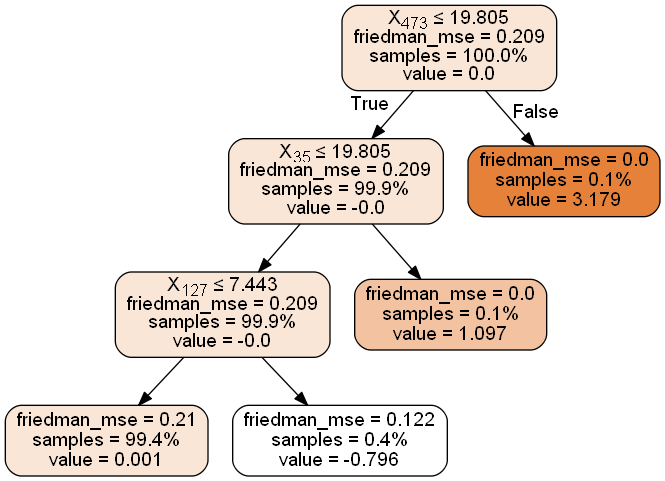

In [21]:
# Graph tree
dot_data = tree.export_graphviz(
    gb_clf.estimators_[9, 0],
    out_file=None, filled=True,
    rounded=True,
    special_characters=True,
    proportion=True,
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())